# export canditate model

In [1]:
import sys
import tensorflow as tf
import keras 

sys.path.append("/home/webphy/Desktop/dnn_processor/")  # just to enable `dataset`
sys.path.append(
    "/home/webphy/Desktop/dnn_processor/dataset/"
)  # just to enable `dataset`
import dataset

# load dataset
train_images_rgx = "../../dataset/resized_dataset_texturas_v2/*/*.jpeg"
valid_images_rgx = "../../dataset/resized_dataset_texturas_v2_test/*/*.jpeg"
train_ds, val_ds, nclass = dataset.create_datasets(
    train_images_rgx, valid_images_rgx, 64
)


2024-02-01 16:27:21.284179: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-01 16:27:21.308702: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-01 16:27:21.308724: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-01 16:27:21.309481: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-01 16:27:21.313775: I tensorflow/core/platform/cpu_feature_guar

In [2]:
exp_id = "exp6_aug_calib"
trial_id = 226
candidate_model = f"saved_models/{exp_id}/best_model_t{trial_id}/"

model = keras.models.load_model(candidate_model)
model.load_weights(candidate_model + "weights/")
model.evaluate(val_ds)

model.summary()

2024-02-01 16:27:24.526803: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


1/1 [==============================] - 2s 2s/step - loss: 0.1907 - accuracy: 0.9600
Model: "model_226"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_227 (InputLayer)      [(None, 256, 256, 3)]     0         
                                                                 
 random_brightness_226 (Ran  (None, 256, 256, 3)       0         
 domBrightness)                                                  
                                                                 
 random_flip_226 (RandomFli  (None, 256, 256, 3)       0         
 p)                                                              
                                                                 
 random_translation_226 (Ra  (None, 256, 256, 3)       0         
 ndomTranslation)                                                
                                                                 
 gaussian_noise_226 (Gaussi  (None, 256

# remove augmentation and regularization layers

In [3]:

x = x_in = keras.layers.Input(shape=(256,256,3))

for l in model.layers:
    if isinstance(l, keras.layers.Conv2D):
        x = l(x)
    if isinstance(l, keras.layers.DepthwiseConv2D):
        x = l(x)
    if isinstance(l, keras.layers.Activation):
        x = l(x)
    if isinstance(l, keras.layers.Flatten):
        x = l(x)
    if isinstance(l, keras.layers.Dense):
        x = l(x)

striped_model = keras.models.Model(x_in, x)
striped_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_676 (Conv2D)         (None, 128, 128, 20)      80        
                                                                 
 activation_628 (Activation  (None, 128, 128, 20)      0         
 )                                                               
                                                                 
 conv2d_677 (Conv2D)         (None, 63, 63, 24)        4344      
                                                                 
 activation_629 (Activation  (None, 63, 63, 24)        0         
 )                                                               
                                                                 
 depthwise_conv2d_178 (Dept  (None, 15, 15, 24)        408   

In [4]:
striped_model.compile(
    "adam", loss=keras.losses.categorical_crossentropy, metrics=["accuracy"]
)

striped_model.evaluate(val_ds)


1/1 [==============================] - 0s 118ms/step - loss: 0.1907 - accuracy: 0.9600


[0.19066886603832245, 0.9599999785423279]

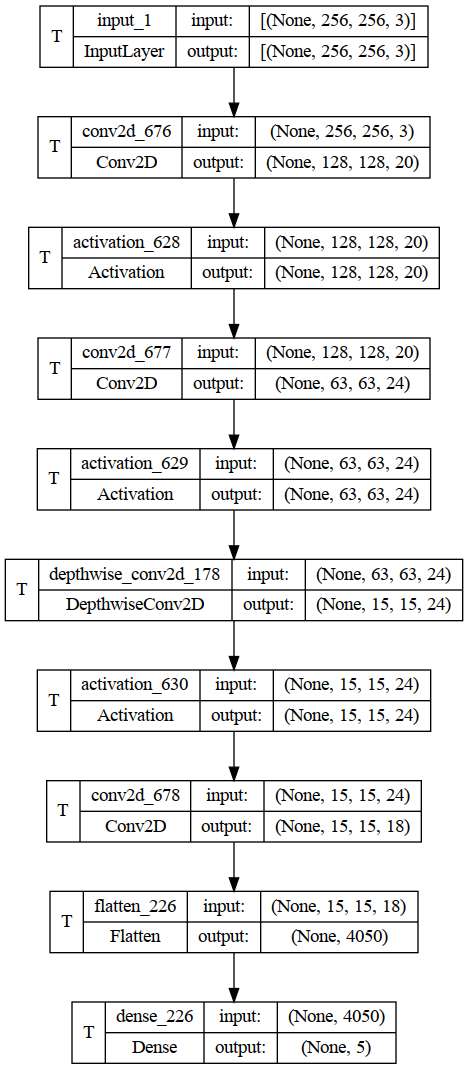

In [5]:
from keras.utils import plot_model

plot_model(
    striped_model,
    to_file="striped_model.png",
    show_shapes=True,
    show_layer_names=True,
    show_trainable=True,
)

In [6]:
striped_model.save(f"saved_models/striped_models/{exp_id}/{trial_id}.h5")

/home/webphy/Desktop/dnn_processor/.venv/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
